## Select articles: random

In this notebook, we simply sample 30 random articles to check whether they contain hateful comments

In [1]:
%load_ext autoreload
%autoreload 2
import sys
# This is to be able to load the django modules
sys.path.append("..")

from mongoengine import connect
from hatespeech_models import Tweet, Article

client = connect("hatespeech-labelling")
db = client["hatespeech-labelling"]

In [2]:
Article.objects.count()

55110

In [3]:
initial_query = {
    "comments__19__exists": True,
    #"comments__hateful_value__gt": 0.9
}
articles = Article.objects(**initial_query).as_pymongo()
print(articles.count())

6519


In [4]:
articles = list(articles)

In [5]:
for article in articles:
    hateful_comments = [c for c in article["comments"] if c["hateful_value"] > 0.5]
    
    article["num_hateful_comments"] = len(hateful_comments)
    article["avg_hate_value"] = sum(c["hateful_value"] for c in article["comments"]) / len(article["comments"])


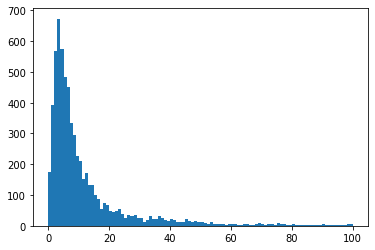

In [6]:
import matplotlib.pyplot as plt

plt.hist([c["num_hateful_comments"] for c in articles], range=[0, 100], bins=100);

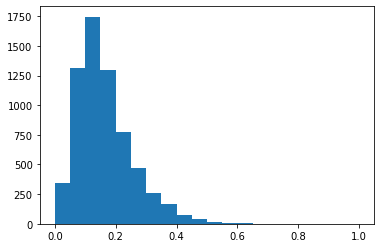

In [7]:
import matplotlib.pyplot as plt

plt.hist([c["avg_hate_value"] for c in articles], range=[0, 1], bins=20);

Elijo una muestra random

In [8]:
import random

random.seed(2020)
selected_articles = random.sample(articles, 30)

In [9]:
len_comments = sum([len(art["comments"]) for art in selected_articles])

print(len_comments)

3964


Text(0.5, 1.0, 'Cantidad de comentarios')

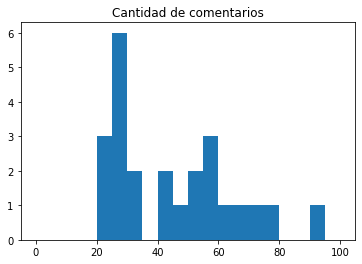

In [10]:

plt.hist([len(art["comments"]) for art in selected_articles], range=[0, 100], bins=20)
plt.title("Cantidad de comentarios")

Text(0.5, 1.0, 'Distribución de fechas de artículos')

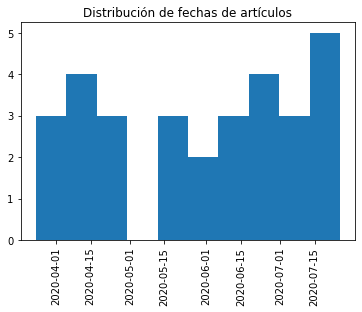

In [11]:

plt.hist([art["created_at"] for art in selected_articles])
plt.xticks(rotation=90);
plt.title("Distribución de fechas de artículos")

In [12]:
from articles.models import Group
from mongoengine import DoesNotExist
try:
    group = Group.objects.get(name="Random")
except DoesNotExist:
    group = Group(name="Random")
    
group.tweet_ids = [art["tweet_id"] for art in selected_articles]
group.save()

Random group with 30 tweets
    